In [131]:
import pandas as pd
import numpy as np
import json
import math
import sys

df=pd.read_csv("C:\\Users\\giuli\\project_w_EXP\\man-shoes\\Datafiniti_Mens_Shoe_Prices.csv", error_bad_lines=False)
df=df[df['prices.currency']=='USD']



b'Skipping line 251: expected 48 fields, saw 49\nSkipping line 444: expected 48 fields, saw 50\nSkipping line 847: expected 48 fields, saw 49\nSkipping line 848: expected 48 fields, saw 49\nSkipping line 1018: expected 48 fields, saw 49\nSkipping line 1575: expected 48 fields, saw 51\nSkipping line 2133: expected 48 fields, saw 49\nSkipping line 2922: expected 48 fields, saw 51\nSkipping line 3777: expected 48 fields, saw 51\nSkipping line 4057: expected 48 fields, saw 49\nSkipping line 4239: expected 48 fields, saw 49\nSkipping line 4240: expected 48 fields, saw 49\nSkipping line 4384: expected 48 fields, saw 49\nSkipping line 4385: expected 48 fields, saw 49\nSkipping line 5388: expected 48 fields, saw 49\nSkipping line 5480: expected 48 fields, saw 49\nSkipping line 5481: expected 48 fields, saw 49\nSkipping line 5907: expected 48 fields, saw 50\nSkipping line 5908: expected 48 fields, saw 50\nSkipping line 6600: expected 48 fields, saw 49\nSkipping line 6601: expected 48 fields, sa

__estrazione materiale

In [132]:
def extract_material(features_json):
    # [{"key":"Material","value":["Suede"]},{"key":"Gender","value":["Men"]},{"key":"Color","value":["Beige"]},{"key":"Model","value":["M254TNN"]},{"key":"Manufacturer Part Number","value":["M254TNN"]},{"key":"Brand","value":["New Balance Numeric"]},{"key":"Age Group","value":["Adult"]}]    
    try:
        if (type(features_json) == float):
            return None
        
        if (type(features_json) != str):
            print( f"WARN not a string but a {type(features_json)} {features_json}" )
            return None
        
        features_json = features_json.replace("\\\\", "\\")
        kvs = json.loads(features_json)
        for kv in kvs:
            if(kv["key"] == "Material"):
                return kv["value"][0]
            
        return None
    except:
        err_type, err_value, err_traceback = sys.exc_info()
        print( f"WARN '{err_type}' '{err_value}' parsing {features_json}" )
        return None
    

    
df["material"] = df["features"].apply( extract_material )

__creazione colonna prezzo medio__

In [133]:
df["prices.amountMax"] = pd.to_numeric(df["prices.amountMax"])
df["prices.amountMin"] = pd.to_numeric(df["prices.amountMin"])
df['medium.price']=(df['prices.amountMin']+df['prices.amountMax'])/2

__restrizione DF a sole colonne di interesse__

In [134]:
df=df[['medium.price', 'material']]

In [135]:
t=df.dropna() # ci liberiamo dei valori nulli
t

,medium.price,material
10,45.00,Synthetic
11,7.99,Synthetic
12,9.99,Synthetic
13,9.99,Synthetic
14,19.99,Synthetic
...,...,...
19291,25.99,Suede
19306,65.99,Synthetic
19307,58.99,Synthetic
19308,34.99,Leather


In [51]:
#verifichiamo come sono distribuiti i materiali. Notiamo molte ripetizioni 

In [136]:
p=(t.groupby('material').count()).sort_values(by=['medium.price'], ascending=False)

p[p['medium.price']>10]

,medium.price
material,
Leather,1834
Synthetic,1067
Canvas,735
Suede,522
Polyester,149
Rubber,119
100% Cotton,108
Mesh,94
Multi,77


__procediamo con la pulizia, l'accorpamento, e la razionalizzazione dei materiali__

In [137]:
def m(x):
    if x=='Cotton Blend' or x=='Cotton blend':
        x='Cotton Blends'
        return x
    else:
        return x
    


In [138]:
def m1(x):
    for i in x:
        return m(x)

In [139]:
t['material']=t['material'].apply(m1)

C:\Users\giuli\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [140]:
p=(t.groupby('material').count()).sort_values(by=['medium.price'], ascending=False)

p[p['medium.price']>5]

,medium.price
material,
Leather,1834
Synthetic,1067
Canvas,735
Suede,522
Polyester,149
...,...
Man-made Upper Suede Trim Rubber Sole,6
Manmade Upper Leather Interior Rubber Outsole,6
Nylon twill (bonding finish on polyester,6


In [141]:
t=t[t['material']!='Unknown']


In [142]:
t=t[t['material']!='Textile']

In [143]:
t=t[t['material']!='Fabric']

In [144]:
t=t[t['material']!='Other']

In [145]:
t=t[t['material']!='Multi']

In [146]:
def m(x):
    if x=='100 percent cotton':
        x='100% Cotton'
        return x
    else:
        return x

def m1(x):
    for i in x:
        return m(x)
    
t['material']=t['material'].apply(m1)

In [147]:
def m(x):
    if x=='Fleece' or x=='56% Copper Nylon/28% Nylon/16% Spandex':
        x='Polyester Blend'
        return x
    else:
        return x

def m1(x):
    for i in x:
        return m(x)
    
t['material']=t['material'].apply(m1)

In [148]:
def m(x):
    if x=='Leather & suede' or x=='Genuine Suede':
        x='Suede'
        return x
    else:
        return x

def m1(x):
    for i in x:
        return m(x)
    
t['material']=t['material'].apply(m1)

In [149]:
def m(x):
    if x=='Cotton':
        x='Cotton Blends'
        return x
    else:
        return x

def m1(x):
    for i in x:
        return m(x)
    
t['material']=t['material'].apply(m1)

In [150]:
def m(x):
    if x=='100%polyester':
        x='100% Polyester'
        return x
    else:
        return x

def m1(x):
    for i in x:
        return m(x)
    
t['material']=t['material'].apply(m1)

In [151]:
def m(x):
    if x=='PVC' or x=='Plastic':
        x='Plastica'
        return x
    else:
        return x

def m1(x):
    for i in x:
        return m(x)
    
t['material']=t['material'].apply(m1)

In [152]:
def m(x):
    if x=='SS304 Stainless Steel / Nylon Coating':
        x='Nylon'
        return x
    else:
        return x

def m1(x):
    for i in x:
        return m(x)
    
t['material']=t['material'].apply(m1)

In [153]:
def m(x):
    if x=='100% Leather Sole ,�� 85% Ragg Woold 15% Nylon Upper' or x=='Leather-And-Synthetic':
        x='Synthetic-And-Leather'
        return x
    else:
        return x

def m1(x):
    for i in x:
        return m(x)
    
t['material']=t['material'].apply(m1)

In [154]:
def m(x):
    if x=='canvas' or x=='Canvas||Gum Rubber':
        x='Canvas'
        return x
    else:
        return x

def m1(x):
    for i in x:
        return m(x)
    
t['material']=t['material'].apply(m1)

In [155]:
def m(x):
    if x=='Leather & suede' or x=='Genuine Suede' or x=='suede':
        x='Suede'
        return x
    else:
        return x

def m1(x):
    for i in x:
        return m(x)
    
t['material']=t['material'].apply(m1)

In [156]:
def m(x):
    if x=='100% Polyester' or x=='Polyester':
        x='Polyester Blend'
        return x
    else:
        return x

def m1(x):
    for i in x:
        return m(x)
    
t['material']=t['material'].apply(m1)

In [157]:
def m(x):
    if x=='Synthetic-And-Mesh':
        x='Mesh'
        return x
    else:
        return x

def m1(x):
    for i in x:
        return m(x)
    
t['material']=t['material'].apply(m1)

In [158]:
def m(x):
    if x=='Synthetics' or x=='Plastic':
        x='Synthetic'
        return x
    else:
        return x

def m1(x):
    for i in x:
        return m(x)
    
t['material']=t['material'].apply(m1)

In [159]:
def m(x):
    if x=='Textile Upper Rubber Outsole' or x=='Man-made Upper Suede Trim Rubber Sole':
        x='Rubber'
        return x
    else:
        return x

def m1(x):
    for i in x:
        return m(x)
    
t['material']=t['material'].apply(m1)

In [160]:
def m(x):
    if x=='Textile Upper Rubber Outsole' or x=='Man-made Upper Suede Trim Rubber Sole':
        x='Rubber'
        return x
    else:
        return x

def m1(x):
    for i in x:
        return m(x)
    
t['material']=t['material'].apply(m1)

In [161]:
def m(x):
    if x=='Genuine Leather' or x=='Leather/Man Made':
        x='Leather'
        return x
    else:
        return x

def m1(x):
    for i in x:
        return m(x)
    
t['material']=t['material'].apply(m1)

In [162]:
def m(x):
    if x=='EVA Foam Rubber & Textile Strap':
        x='Rubber'
        return x
    else:
        return x

def m1(x):
    for i in x:
        return m(x)
    
t['material']=t['material'].apply(m1)

In [163]:
def m(x):
    if x=='Synthetic-And-Mesh':
        x='Mesh'
        return x
    else:
        return x

def m1(x):
    for i in x:
        return m(x)
    
t['material']=t['material'].apply(m1)

In [165]:
df_nat = t.copy()
df_nat

,medium.price,material
10,45.00,Synthetic
11,7.99,Synthetic
12,9.99,Synthetic
13,9.99,Synthetic
14,19.99,Synthetic
...,...,...
19291,25.99,Suede
19306,65.99,Synthetic
19307,58.99,Synthetic
19308,34.99,Leather


__vogliamo creare una colonna dove segnalare se l'articolo è fatto con materiali naturali__

In [166]:
def natural(x):
    n={'Canvas', 'Corduroy', 'Linen', 'Rubber', '100% Cotton', 'Mesh'}
    p=''
    for i in n:
        if i in x:
            p=p+i
            return p
    else:
            return False
    
    
    
def g(x):
    for i in x:
        return natural(x)
    
df_nat['material']= df_nat['material'].apply(g)
        

In [167]:
df_nat

,medium.price,material
10,45.00,False
11,7.99,False
12,9.99,False
13,9.99,False
14,19.99,False
...,...,...
19291,25.99,False
19306,65.99,False
19307,58.99,False
19308,34.99,False


__prendiamo in esame solo gli articoli con materiale naturale e creiamo il grafico __

In [169]:
df_nat=df_nat[df_nat['material']!=False]

df_nat

,medium.price,material
42,43.98,Canvas
43,110.00,Canvas
44,24.99,Canvas
45,31.99,Canvas
47,56.99,Canvas
...,...,...
19261,46.99,Canvas
19265,13.99,Canvas
19266,95.00,Canvas
19267,16.99,Canvas


In [189]:
p=df_nat.groupby('material').mean().sort_values(by=['medium.price'], ascending=False)

p

,medium.price
material,
Linen,189.120000
Mesh,82.897536
Canvas,53.174644
Rubber,43.351416
100% Cotton,33.373684
Corduroy,20.321667


In [171]:
import matplotlib.pyplot as plot

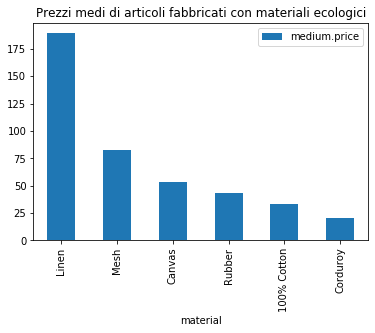

In [172]:
p.plot.bar(title="Prezzi medi di articoli fabbricati con materiali ecologici")

plot.show(block=True)

In [196]:
df_sint = t.copy()
df_sint

,medium.price,material
10,45.00,Synthetic
11,7.99,Synthetic
12,9.99,Synthetic
13,9.99,Synthetic
14,19.99,Synthetic
...,...,...
19291,25.99,Suede
19306,65.99,Synthetic
19307,58.99,Synthetic
19308,34.99,Leather


In [197]:
def not_eco(x):
    q={'Synthetic', 'Nylon', 'PVC', 'Polyester Blend', 'Cotton blend', 'Leather', 'Suede'}
    p=''
    for i in q:
        if i in x:
            p=p+i
            return p
    else:
            return False


def g(x):
    for i in x:
        return not_eco(x)
    
df_sint['material']= df_sint['material'].apply(g)

In [198]:
df_sint=df_sint[df_sint['material']!=False]
df_sint

,medium.price,material
10,45.00,Synthetic
11,7.99,Synthetic
12,9.99,Synthetic
13,9.99,Synthetic
14,19.99,Synthetic
...,...,...
19291,25.99,Suede
19306,65.99,Synthetic
19307,58.99,Synthetic
19308,34.99,Leather


In [203]:
y=df_sint.groupby('material').mean().sort_values(by=['medium.price'], ascending=False)

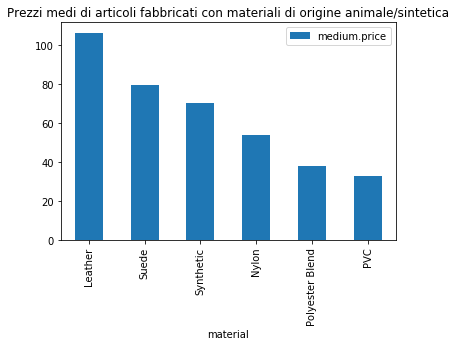

In [204]:
y.plot.bar(title="Prezzi medi di articoli fabbricati con materiali di origine animale/sintetica")

plot.show(block=True)